### Problem Statement
An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market. 
<br><br>
In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers. 
<br><br>
You are required to help the manager to predict the right group of the new customers.<br><br>
You can check this link: https://datahack.analyticsvidhya.com/contest/janatahack-customer-segmentation/

## Algorithms Covered

1. In this notebook, we are going to use **Decision Tree** and **Random Forest** algorithms to solve the same problem.

2. In first notebook, we used **One vs Rest(OvR)** and **One vs One(OvO)** algorithms to solve the problem, [click here to see](https://www.kaggle.com/mittalvasu95/multi-class-classification-c101)

3. In the last notebook, we are going to use **k-NN** and **Naive Bayes** algorithms to solve the same problem, [click here to see](https://www.kaggle.com/mittalvasu95/multi-class-classification-c103?scriptVersionId=43468336)

**Note**:The EDA process is same in all the three notebooks. The only change is in algorithm to solve the problem.

### Variables Description

           
| Variable	            | Definition                                                        |
|---------------------- |-------------------------------------------------------------------|
| ID	                | Unique ID                                                         |
| Gender	            | Gender of the customer                                            |
| Ever_Married	        | Marital status of the customer                                    |
| Age	                | Age of the customer                                               |
| Graduated	            | Is the customer a graduate?                                       |
| Profession	        | Profession of the customer                                        |
| Work_Experience	    | Work Experience in years                                          |
| Spending_Score	    | Spending score of the customer                                    |
| Family_Size	        | Number of family members for the customer(including the customer) |
| Var_1	                | Anonymised Category for the customer                              |
| Segmentation(target)  | Customer Segment of the customer                                  |

## Multi Class Classification 
- A classification task with more than two classes; e.g., classify a set of images of fruits which may be oranges, apples, or pears. Multi-class classification makes the assumption that each sample is assigned to one and only one label: a fruit can be either an apple or a pear but not both at the same time. 
- Common examples include image classification (is it a cat, dog, human, etc) or handwritten digit recognition (classifying an image of a handwritten number into a digit from 0 to 9).
- In machine learning, multiclass or multinomial classification is the problem of classifying instances into one of three or more classes (classifying instances into one of two classes is called binary classification).
- Multiclass classification should not be confused with multi-label classification, where multiple labels are to be predicted for each instance.

### <font color = 'blue'>Topics Covered in this notebook</font>
1. Basic cleaning and EDA
2. Decision Tree
    - Model Building with two different dataframes
    - Model Evaluation
    - Final comment on which dataframe is good for this algorithm
3. Random Forest
    - Model Building with two different dataframes
    - Model Evaluation
    - Final comment on which dataframe is good for this algorithm

---
## <font color='orange'>Step I: Importing, Cleaning and EDA

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_style('darkgrid')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#### Training data

In [ ]:
# Loading the train data
df = pd.read_csv('/kaggle/input/customer/Train.csv')

# Looking top 10 rows
df.head(10)

In [ ]:
# Looking the bigger picture
df.info()

<font color='blue'>1. We have seen that there are `missing values` in the dataset. So we will work on data cleaning.<br>
<font color='blue'>2. `Create some new attributes` based upon given data/domain knowledge/prior experience.<br>
<font color='blue'>3. Create graphs and `performs EDA` and write observations.

In [ ]:
# Checking the number of missing values in each column
df.isnull().sum()

In [ ]:
# Removing all those rows that have 3 or more missing values
df = df.loc[df.isnull().sum(axis=1)<3]

In [ ]:
# Looking random 10 rows of the data
df.sample(10)

###### Var_1

In [ ]:
print('The count of each category\n',df.Var_1.value_counts())

In [ ]:
# Checking for null values
df.Var_1.isnull().sum()

In [ ]:
# Filling the missing values w.r.t other attributes underlying pattern 
df.loc[ (pd.isnull(df['Var_1'])) & (df['Graduated'] == 'Yes'),"Var_1"] = 'Cat_6'
df.loc[ (pd.isnull(df['Var_1'])) & (df['Graduated'] == 'No'),"Var_1"] = 'Cat_4'
df.loc[ (pd.isnull(df["Var_1"])) & ((df['Profession'] == 'Lawyer') | (df['Profession'] == 'Artist')),"Var_1"] = 'Cat_6'
df.loc[ (pd.isnull(df["Var_1"])) & (df['Age'] > 40),"Var_1"] = 'Cat_6'

**Ways to treat missing values**<br>
Check here:https://www.datasciencenovice.com/2020/08/5-ways-to-treat-missing-values.html

In [ ]:
# Counting Var_1 in each segment
ax1 = df.groupby(["Segmentation"])["Var_1"].value_counts().unstack().round(3)

# Percentage of category of Var_1 in each segment
ax2 = df.pivot_table(columns='Var_1',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

<font color='blue'>In each of the segment the count of cat_6 or proportion of cat_6 is very high i.e. most of the entries in the given data belongs to cat_6.

###### Gender

In [ ]:
print('The count of gender\n',df.Gender.value_counts())

In [ ]:
# Checking the count of missing values
df.Gender.isnull().sum()

In [ ]:
# Counting male-female in each segment
ax1 = df.groupby(["Segmentation"])["Gender"].value_counts().unstack().round(3)

# Percentage of male-female in each segment
ax2 = df.pivot_table(columns='Gender',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

<font color='blue'>All the 4 segments have around same number of male-female distribution. In all segment male are more than female. <br> 
<font color='blue'>But segment D has highest male percentage as compared to other segments.

###### Ever Married

In [ ]:
print('Count of married vs not married\n',df.Ever_Married.value_counts())

In [ ]:
# Checking the count of missing values
df.Ever_Married.isnull().sum()

In [ ]:
# Filling the missing values w.r.t other attributes underlying pattern
df.loc[ (pd.isnull(df["Ever_Married"])) & ((df['Spending_Score'] == 'Average') | (df['Spending_Score'] == 'High')),"Ever_Married"] = 'Yes'
df.loc[ (pd.isnull(df["Ever_Married"])) & (df['Spending_Score'] == 'Low'),"Ever_Married"] = 'No'
df.loc[ (pd.isnull(df["Ever_Married"])) & (df['Age'] > 40),"Ever_Married"] = 'Yes'
df.loc[ (pd.isnull(df["Ever_Married"])) & (df['Profession'] == 'Healthcare'),"Ever_Married"] = 'No'

In [ ]:
# Counting married and non-married in each segment
ax1 = df.groupby(["Segmentation"])["Ever_Married"].value_counts().unstack().round(3)

# Percentage of married and non-married in each segment
ax2 = df.pivot_table(columns='Ever_Married',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

<font color='blue'>We seen that most of the customers in segment C are married while segment D has least number of married customers. It means segment D is a group of customers that are singles and maybe younger in age. 

###### Age

In [ ]:
df.Age.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

In [ ]:
# Checking the count of missing values
df.Age.isnull().sum()

In [ ]:
# Looking the distribution of column Age
plt.figure(figsize=(10,5))

skewness = round(df.Age.skew(),2)
kurtosis = round(df.Age.kurtosis(),2)
mean = round(np.mean(df.Age),0)
median = np.median(df.Age)

plt.subplot(1,2,1)
sns.boxplot(y=df.Age)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(1,2,2)
sns.distplot(df.Age)
plt.title('Distribution Plot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.show()

In [ ]:
# Looking the distribution of column Age w.r.t to each segment
a = df[df.Segmentation =='A']["Age"]
b = df[df.Segmentation =='B']["Age"]
c = df[df.Segmentation =='C']["Age"]
d = df[df.Segmentation =='D']["Age"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = df, x = "Segmentation", y="Age")
plt.title('Boxplot')

plt.subplot(1,2,2)
sns.kdeplot(a,shade= False, label = 'A')
sns.kdeplot(b,shade= False, label = 'B')
sns.kdeplot(c,shade= False, label = 'C')
sns.kdeplot(d,shade= False, label = 'D')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))

plt.show()

<font color='blue'>The mean age of segment D is 33 and we can say that people in this segment are belong to 30s i.e. they are younger and also from 'ever_married' distribution it is seen that segment D has maximum number of customers who are singles indicating they are younger.<br>
<font color='blue'>Also segment C has mean age of 49 and we also seen that most cutomers in this segment are married. 

In [ ]:
# Converting the datatype from float to int
df['Age'] = df['Age'].astype(int)

In [ ]:
df.Age.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

In [ ]:
# Divide people in the 4 age group
df['Age_Bin'] = pd.cut(df.Age,bins=[17,30,45,60,90],labels=['17-30','31-45','46-60','60+'])

In [ ]:
# Counting different age group in each segment
ax1 = df.groupby(["Segmentation"])["Age_Bin"].value_counts().unstack().round(3)

# Percentage of age bins in each segment
ax2 = df.pivot_table(columns='Age_Bin',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

###### Graduated

In [ ]:
print('Count of each graduate and non-graduate\n',df.Graduated.value_counts())

In [ ]:
# Checking the count of missing values
df.Graduated.isnull().sum()

In [ ]:
# Filling the missing values w.r.t other attributes underlying pattern
df.loc[ (pd.isnull(df["Graduated"])) & (df['Spending_Score'] == 'Average'),"Graduated"] = 'Yes'
df.loc[ (pd.isnull(df["Graduated"])) & (df['Profession'] == 'Artist'),"Graduated"] = 'Yes'
df.loc[ (pd.isnull(df["Graduated"])) & (df['Age'] > 49),"Graduated"] = 'Yes'
df.loc[ (pd.isnull(df["Graduated"])) & (df['Var_1'] == 'Cat_4'),"Graduated"] = 'No'
df.loc[ (pd.isnull(df["Graduated"])) & (df['Ever_Married'] == 'Yes'),"Graduated"] = 'Yes'

# Replacing remaining NaN with previous values
df['Graduated'] = df['Graduated'].fillna(method='pad')

In [ ]:
# Counting graduate and non-graduate in each segment
ax1 = df.groupby(["Segmentation"])["Graduated"].value_counts().unstack().round(3)

# Percentage of graduate and non-graduate in each segment
ax2 = df.pivot_table(columns='Graduated',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

<font color='blue'>Segment C has most number of customers who are graduated while segment D has lowest number of graduate customers.

###### Profession

In [ ]:
print('Count of each profession\n',df.Profession.value_counts())

In [ ]:
# Checking the count of missing values
df.Profession.isnull().sum()

In [ ]:
# Filling the missing values w.r.t other attributes underlying pattern
df.loc[ (pd.isnull(df["Profession"])) & (df['Work_Experience'] > 8),"Profession"] = 'Homemaker'
df.loc[ (pd.isnull(df["Profession"])) & (df['Age'] > 70),"Profession"] = 'Lawyer'
df.loc[ (pd.isnull(df["Profession"])) & (df['Family_Size'] < 3),"Profession"] = 'Lawyer'
df.loc[ (pd.isnull(df["Profession"])) & (df['Spending_Score'] == 'Average'),"Profession"] = 'Artist'
df.loc[ (pd.isnull(df["Profession"])) & (df['Graduated'] == 'Yes'),"Profession"] = 'Artist'
df.loc[ (pd.isnull(df["Profession"])) & (df['Ever_Married'] == 'Yes'),"Profession"] = 'Artist'
df.loc[ (pd.isnull(df["Profession"])) & (df['Ever_Married'] == 'No'),"Profession"] = 'Healthcare'
df.loc[ (pd.isnull(df["Profession"])) & (df['Spending_Score'] == 'High'),"Profession"] = 'Executives'

In [ ]:
# Count of segments in each profession
ax1 = df.groupby(["Profession"])["Segmentation"].value_counts().unstack().round(3)

# Percentage of segments in each profession
ax2 = df.pivot_table(columns='Segmentation',index='Profession',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (16,5))
label = ['Artist','Doctor','Engineer','Entertainment','Executives','Healthcare','Homemaker','Lawyer','Marketing']
ax[0].set_xticklabels(labels = label,rotation = 45)

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (16,5))
ax[1].set_xticklabels(labels = label,rotation = 45)

plt.show()

<font color='blue'>Segment A,B and C have major customers from profession:**Artist** while Segment D have major customers from profession:**Healthcare** <br>
**Homemaker** is least in all the four segment

###### Work Experience

In [ ]:
df.Work_Experience.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

In [ ]:
# Checking the count of missing values
df.Work_Experience.isnull().sum()

In [ ]:
# Replacing NaN with previous values
df['Work_Experience'] = df['Work_Experience'].fillna(method='pad')

In [ ]:
# Looking the distribution of column Work Experience
plt.figure(figsize=(15,10))

skewness = round(df.Work_Experience.skew(),2)
kurtosis = round(df.Work_Experience.kurtosis(),2)
mean = round(np.mean(df.Work_Experience),0)
median = np.median(df.Work_Experience)

plt.subplot(1,2,1)
sns.boxplot(y=df.Work_Experience)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(2,2,2)
sns.distplot(df.Work_Experience)
plt.title('Distribution Plot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.show()

In [ ]:
# Looking the distribution of column Work_Experience w.r.t to each segment
a = df[df.Segmentation =='A']["Work_Experience"]
b = df[df.Segmentation =='B']["Work_Experience"]
c = df[df.Segmentation =='C']["Work_Experience"]
d = df[df.Segmentation =='D']["Work_Experience"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = df, x = "Segmentation", y="Work_Experience")
plt.title('Boxplot')

plt.subplot(1,2,2)
sns.kdeplot(a,shade= False, label = 'A')
sns.kdeplot(b,shade= False, label = 'B')
sns.kdeplot(c,shade= False, label = 'C')
sns.kdeplot(d,shade= False, label = 'D')
plt.xlabel('Work Experience')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))

plt.show()

<font color='blue'>Segment D has people with relatively more experienced than other segments while Segment C has people with low experience

In [ ]:
# Changing the data type
df['Work_Experience'] = df['Work_Experience'].astype(int)

In [ ]:
df.Work_Experience.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

In [ ]:
# Dividing the people into 3 category of work experience 
df['Work_Exp_Category'] = pd.cut(df.Work_Experience,bins=[-1,1,7,15],labels=['Low Experience','Medium Experience','High Experience'])

In [ ]:
# Counting different category of work experience in each segment
ax1 = df.groupby(["Segmentation"])["Work_Exp_Category"].value_counts().unstack().round(3)

# Percentage of work experience in each segment
ax2 = df.pivot_table(columns='Work_Exp_Category',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

###### Spending Score

In [ ]:
print('Count of spending score\n',df.Spending_Score.value_counts())

In [ ]:
# Checking the count of missing values
df.Spending_Score.isnull().sum()

In [ ]:
# Counting different category of spending score in each segment
ax1 = df.groupby(["Segmentation"])["Spending_Score"].value_counts().unstack().round(3)

# Percentage of spending score in each segment
ax2 = df.pivot_table(columns='Spending_Score',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

<font color='blue'>Segment D has maximum number of people with low spending score while in Segment C average spending people are more.

###### Family Size

In [ ]:
df.Family_Size.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

In [ ]:
# Checking the count of missing values
df.Family_Size.isnull().sum()

In [ ]:
# Filling the missing values w.r.t other attributes underlying pattern
df.loc[ (pd.isnull(df["Family_Size"])) & (df['Ever_Married'] == 'Yes'),"Family_Size"] = 2.0
df.loc[ (pd.isnull(df["Family_Size"])) & (df['Var_1'] == 'Cat_6'),"Family_Size"] = 2.0
df.loc[ (pd.isnull(df["Family_Size"])) & (df['Graduated'] == 'Yes'),"Family_Size"] = 2.0

# Fill remaining NaN with previous values
df['Family_Size'] = df['Family_Size'].fillna(method='pad')

In [ ]:
# Looking the distribution of column Work Experience
plt.figure(figsize=(15,10))

skewness = round(df.Family_Size.skew(),2)
kurtosis = round(df.Family_Size.kurtosis(),2)
mean = round(np.mean(df.Family_Size),0)
median = np.median(df.Family_Size)

plt.subplot(1,2,1)
sns.boxplot(y=df.Family_Size)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(2,2,2)
sns.distplot(df.Family_Size)
plt.title('Distribution Plot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.show()

In [ ]:
# Looking the distribution of column Family Size w.r.t to each segment
a = df[df.Segmentation =='A']["Family_Size"]
b = df[df.Segmentation =='B']["Family_Size"]
c = df[df.Segmentation =='C']["Family_Size"]
d = df[df.Segmentation =='D']["Family_Size"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data = df, x = "Segmentation", y="Family_Size")
plt.title('Boxplot')

plt.subplot(1,2,2)
sns.kdeplot(a,shade= False, label = 'A')
sns.kdeplot(b,shade= False, label = 'B')
sns.kdeplot(c,shade= False, label = 'C')
sns.kdeplot(d,shade= False, label = 'D')
plt.xlabel('Family Size')
plt.ylabel('Density')
plt.title("Mean\n A: {}\n B: {}\n C: {}\n D: {}".format(round(a.mean(),0),round(b.mean(),0),round(c.mean(),0),round(d.mean(),0)))

plt.show()

In [ ]:
# Changing the data type
df['Family_Size'] = df['Family_Size'].astype(int)

In [ ]:
df.Family_Size.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

In [ ]:
# Divide family size into 3 category
df['Family_Size_Category'] = pd.cut(df.Family_Size,bins=[0,4,6,10],labels=['Small Family','Big Family','Joint Family'])

In [ ]:
# Counting different category of family size in each segment
ax1 = df.groupby(["Segmentation"])["Family_Size_Category"].value_counts().unstack().round(3)

# Percentage of family size in each segment
ax2 = df.pivot_table(columns='Family_Size_Category',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(3)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))
plt.show()

<font color='blue'>In the given data it is observed that most of the people have family size of 1 or 2 (i.e. they have small family).<br> But Segment D has more number of  big families as compared to other segments.

###### Segmentation

In [ ]:
print('Count of each category of segmentation\n',df.Segmentation.value_counts())

In [ ]:
segments = df.loc[:,"Segmentation"].value_counts()
plt.xlabel("Segment")
plt.ylabel('Count')
sns.barplot(segments.index , segments.values).set_title('Segments')
plt.show()

In [ ]:
df.reset_index(drop=True, inplace=True)
df.info()

In [ ]:
# number of unique ids
df.ID.nunique()

<font color='blue'>Now all the data has been cleaned. There is no missing value and columns are in right format. <br>
<font color='blue'>All the ids are unique that is there is no duplicate entry.<br>
<font color='blue'>Created new column: 'Age_Bin', 'Work_Exp_Category' and 'Family_Size_Category'. <br> 
<font color='blue'>Delete only 0.2% of rows. 

In [ ]:
df.describe(include='all')

In [ ]:
df = df[['ID','Gender', 'Ever_Married', 'Age', 'Age_Bin', 'Graduated', 'Profession', 'Work_Experience', 'Work_Exp_Category',
         'Spending_Score', 'Family_Size', 'Family_Size_Category','Var_1', 'Segmentation']]
df.head(10)

#### <font color='red'>Making two different dataframes
<font color='red'>Now we consider/make two different dataframes apart from the above main dataframe (namely df) <br>
- `df1`: Spending Score(ranking), Age(normalise), Work_Experience(normalise), Family Size(normalise)
- `df2`: Spending Score(dummy variables), Age Bin(dummy variables), Work_Exp_Category(dummy variables), Family_Size_Category(dummy variables)

In [ ]:
df1 = df.copy()
df1.head()

In [ ]:
# Separating dependent-independent variables
X = df1.drop('Segmentation',axis=1)
y = df1['Segmentation']

In [ ]:
# import the train-test split
from sklearn.model_selection import train_test_split

# divide into train and test sets
df1_trainX, df1_testX, df1_trainY, df1_testY = train_test_split(X,y, train_size = 0.7, random_state = 101, stratify=y)

###### Preprocessing on train data

In [ ]:
# converting binary variables to numeric
df1_trainX['Gender'] = df1_trainX['Gender'].replace(('Male','Female'),(1,0))
df1_trainX['Ever_Married'] = df1_trainX['Ever_Married'].replace(('Yes','No'),(1,0))
df1_trainX['Graduated'] = df1_trainX['Graduated'].replace(('Yes','No'),(1,0))
df1_trainX['Spending_Score'] = df1_trainX['Spending_Score'].replace(('High','Average','Low'),(3,2,1))

# converting nominal variables into dummy variables
pf = pd.get_dummies(df1_trainX.Profession,prefix='Profession')
df1_trainX = pd.concat([df1_trainX,pf],axis=1)

vr = pd.get_dummies(df1_trainX.Var_1,prefix='Var_1')
df1_trainX = pd.concat([df1_trainX,vr],axis=1)

# scaling continuous variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1_trainX[['Age','Work_Experience','Family_Size']] = scaler.fit_transform(df1_trainX[['Age','Work_Experience','Family_Size']])

df1_trainX.drop(['ID','Age_Bin','Profession','Work_Exp_Category','Family_Size_Category','Var_1'], axis=1, inplace=True)

###### Preprocessing on test data

In [ ]:
# converting binary variables to numeric
df1_testX['Gender'] = df1_testX['Gender'].replace(('Male','Female'),(1,0))
df1_testX['Ever_Married'] = df1_testX['Ever_Married'].replace(('Yes','No'),(1,0))
df1_testX['Graduated'] = df1_testX['Graduated'].replace(('Yes','No'),(1,0))
df1_testX['Spending_Score'] = df1_testX['Spending_Score'].replace(('High','Average','Low'),(3,2,1))

# converting nominal variables into dummy variables
pf = pd.get_dummies(df1_testX.Profession,prefix='Profession')
df1_testX = pd.concat([df1_testX,pf],axis=1)

vr = pd.get_dummies(df1_testX.Var_1,prefix='Var_1')
df1_testX = pd.concat([df1_testX,vr],axis=1)

# scaling continuous variables
df1_testX[['Age','Work_Experience','Family_Size']] = scaler.transform(df1_testX[['Age','Work_Experience','Family_Size']])

df1_testX.drop(['ID','Age_Bin','Profession','Work_Exp_Category','Family_Size_Category','Var_1'], axis=1, inplace=True)

In [ ]:
df1_trainX.shape, df1_trainY.shape, df1_testX.shape, df1_testY.shape

In [ ]:
# Correlation matrix
plt.figure(figsize=(17,10))
sns.heatmap(df1_trainX.corr(method='spearman').round(2),linewidth = 0.5,annot=True,cmap="YlGnBu")
plt.show()

##### Why Spearman?
Check this: https://idkwhoneedstohearthis.blogspot.com/2020/05/correlation-why-spearmans.html

##### Observation:
1. `Age` and `Ever_Married` has a positive correlation of 0.6 which means that people who are married have more age as compared to those who are unmarried.
2. `Age` and `Profession_Healthcare` has a negative correlation of 0.5 which means all those people whose profession is healthcare are younger in age to those who of other professions people.
3. `Profession_Healthcare` and `Ever_Married` has negative correlation of 0.42 which means all those peoples whose profession is healthcare are unmarried.(only 13% of healthcare professionals are married).
4. `Age` and `Profession_Lawyer` has a positive correlation of 0.42 which means all those people whose profession is lawyer are older in age to those of other professions people.
5. `Ever_Married` and `Spending_Average` has a positive correlation which means those who are married spend averagely.(around 42% married people spent averagely)
6. `Ever_Married` and `Spending_High` has a little positive correlation which means those who are married spend high.(around 25% of married people spent high)
7. `Ever_Married` and `Spending_Low` has a negative correlation of 0.67 which means those who are unmarried spent low.(round 99% of unmarried people spent low )
8. `Age` and `Spending_Score` has a positive correlation of 0.42 which means as age increase the spending power also increase.
9. `Profession_Executives` and `Spending_High` has positive correlation of 0.40 which means all those peoples whose profession is executive spent high.(around 66% of executives spent high).

In [ ]:
df2 = df.copy()
df2.head()

In [ ]:
# Separating dependent-independent variables
X = df2.drop('Segmentation',axis=1)
y = df2['Segmentation']

In [ ]:
# import the train-test split
from sklearn.model_selection import train_test_split

# divide into train and test sets
df2_trainX, df2_testX, df2_trainY, df2_testY = train_test_split(X,y, train_size = 0.7, random_state = 101, stratify=y)

###### Preprocessing in train data

In [ ]:
# Converting binary to numeric
df2_trainX['Gender'] = df2_trainX['Gender'].replace(('Male','Female'),(1,0))
df2_trainX['Ever_Married'] = df2_trainX['Ever_Married'].replace(('Yes','No'),(1,0))
df2_trainX['Graduated'] = df2_trainX['Graduated'].replace(('Yes','No'),(1,0))

# Converting nominal variables to dummy variables
ab = pd.get_dummies(df2_trainX.Age_Bin,prefix='Age_Bin')
df2_trainX = pd.concat([df2_trainX,ab],axis=1)

pf = pd.get_dummies(df2_trainX.Profession,prefix='Profession')
df2_trainX = pd.concat([df2_trainX,pf],axis=1)

we = pd.get_dummies(df2_trainX.Work_Exp_Category,prefix='WorkExp')
df2_trainX = pd.concat([df2_trainX,we],axis=1)

sc = pd.get_dummies(df2_trainX.Spending_Score,prefix='Spending')
df2_trainX = pd.concat([df2_trainX,sc],axis=1)

fs = pd.get_dummies(df2_trainX.Family_Size_Category,prefix='FamilySize')
df2_trainX = pd.concat([df2_trainX,fs],axis=1)

vr = pd.get_dummies(df2_trainX.Var_1,prefix='Var_1')
df2_trainX = pd.concat([df2_trainX,vr],axis=1)

df2_trainX.drop(['ID','Age','Age_Bin','Profession','Work_Experience','Work_Exp_Category','Spending_Score',
               'Family_Size','Family_Size_Category','Var_1'],axis=1,inplace=True)

###### Preprocessing in test data

In [ ]:
# Converting binary to numeric
df2_testX['Gender'] = df2_testX['Gender'].replace(('Male','Female'),(1,0))
df2_testX['Ever_Married'] = df2_testX['Ever_Married'].replace(('Yes','No'),(1,0))
df2_testX['Graduated'] = df2_testX['Graduated'].replace(('Yes','No'),(1,0))

# Converting nominal variables to dummy variables
ab = pd.get_dummies(df2_testX.Age_Bin,prefix='Age_Bin')
df2_testX = pd.concat([df2_testX,ab],axis=1)

pf = pd.get_dummies(df2_testX.Profession,prefix='Profession')
df2_testX = pd.concat([df2_testX,pf],axis=1)

we = pd.get_dummies(df2_testX.Work_Exp_Category,prefix='WorkExp')
df2_testX = pd.concat([df2_testX,we],axis=1)

sc = pd.get_dummies(df2_testX.Spending_Score,prefix='Spending')
df2_testX = pd.concat([df2_testX,sc],axis=1)

fs = pd.get_dummies(df2_testX.Family_Size_Category,prefix='FamilySize')
df2_testX = pd.concat([df2_testX,fs],axis=1)

vr = pd.get_dummies(df2_testX.Var_1,prefix='Var_1')
df2_testX = pd.concat([df2_testX,vr],axis=1)

df2_testX.drop(['ID','Age','Age_Bin','Profession','Work_Experience','Work_Exp_Category','Spending_Score',
               'Family_Size','Family_Size_Category','Var_1'],axis=1,inplace=True)

In [ ]:
df2_trainX.shape, df2_trainY.shape, df2_testX.shape, df2_testY.shape

In [ ]:
# Correlation matrix
plt.figure(figsize=(17,10))
sns.heatmap(df2_trainX.corr(method='spearman').round(2),linewidth = 0.5,annot=True,cmap="YlGnBu")
plt.show()

---
## <font color='orange'>Step II: Model Building

### III. Decision Tree

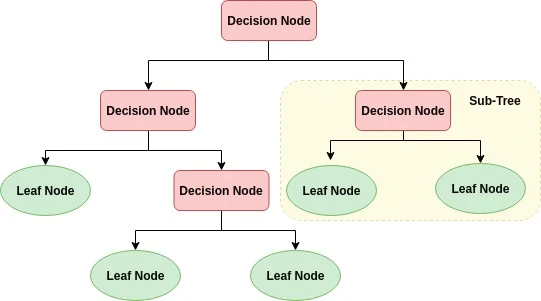

- Decision tree is a type of supervised learning algorithm (having a predefined target variable) that is mostly used in classification problems. It works for both categorical and continuous input and output variables. In this technique, we split the population or sample into two or more homogeneous sets (or sub-populations) based on most significant splitter / differentiator in input variables.
- A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.
- Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. 
- Its training time is faster compared to the neural network algorithm. The time complexity of decision trees is a function of the number of records and number of attributes in the given data.
- The decision tree is a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions. Decision trees can handle high dimensional data with good accuracy.

#### How does the Decision Tree algorithm work?
The basic idea behind any decision tree algorithm is as follows:<br>

1. Select the best attribute using Attribute Selection Measures(ASM) to split the records.
2. Make that attribute a decision node and breaks the dataset into smaller subsets.
3. Starts tree building by repeating this process recursively for each child until one of the condition will match:
    1. All the tuples belong to the same attribute value.
    2. There are no more remaining attributes.
    3. There are no more instances.

**Further Reading**
- https://www.analyticsvidhya.com/blog/2016/04/tree-based-algorithms-complete-tutorial-scratch-in-python/
- https://www.datacamp.com/community/tutorials/decision-tree-classification-python

#### Building the model with `first_type` of dataframe(df_type1)

In [ ]:
train_dt1_x = df1_trainX.copy()
train_dt1_x.head()

In [ ]:
train_dt1_y = df1_trainY.copy()
train_dt1_y.head()

In [ ]:
# importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

# creating the decision tree function
model_dt1 = DecisionTreeClassifier(random_state=10,criterion='gini')

#fitting the model
model_dt1.fit(train_dt1_x, train_dt1_y)

# depth of the decision tree
print('Depth of the Decision Tree: ', model_dt1.get_depth())

#checking the training score
print('Accuracy on training: ',model_dt1.score(train_dt1_x, train_dt1_y))

# predict the target on the train dataset
yhat1 = model_dt1.predict(train_dt1_x)

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(train_dt1_y.values, yhat1, labels=["A","B","C","D"])
print('-------The confusion matrix for this model is-------')
print(cm1)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_dt1_y.values, yhat1))

In [ ]:
X1 = train_dt1_x.copy()
y1 = pd.DataFrame({'Seg':train_dt1_y})
y1['Seg'] = y1['Seg'].replace(('A','B','C','D'),(1,2,3,4))

In [ ]:
# Implementing grid search

parameter_grid = {
    'max_depth' : [24,25,26,27,28,29,30],
    'max_features': [0.3, 0.5, 0.7]
    }

from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=model_dt1, param_grid=parameter_grid, scoring='neg_mean_squared_error', cv=5)

gridsearch.fit(X1, y1)

print(gridsearch.best_params_)

In [ ]:
# Implementing random search

parameter_grid = {
    'max_depth' : [24,25,26,27,28,29,30],
    'max_features': [0.3, 0.5, 0.7,0.9]
    }

from sklearn.model_selection import RandomizedSearchCV

randomsearch = RandomizedSearchCV(estimator=model_dt1, param_distributions=parameter_grid, n_iter= 10, cv=5)
randomsearch.fit(X1, y1)

print(randomsearch.best_params_)

In [ ]:
# final model
model_dt1 = DecisionTreeClassifier(max_depth=26, max_features=0.9 ,random_state=10)

# fitting the model
model_dt1.fit(train_dt1_x, train_dt1_y)

# Training score
print(model_dt1.score(train_dt1_x, train_dt1_y).round(4))

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_dt1, feature_names=train_dt1_x.columns, max_depth=2, filled=True)

#### Predicting on test set

In [ ]:
test_dt1_x = df1_testX.copy()
test_dt1_x.head()

In [ ]:
test_dt1_y = df1_testY.copy()
test_dt1_y.head()

In [ ]:
y_dt1 = model_dt1.predict(test_dt1_x)
y_dt1

In [ ]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_dt1_y.values, y_dt1, labels=["A","B","C","D"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_dt1_y.values, y_dt1))

In [ ]:
pd.Series(y_dt1).value_counts()

#### Building the model with `second type` of dataframe(df_type2)

In [ ]:
train_dt2_x = df2_trainX.copy()
train_dt2_x.head()

In [ ]:
train_dt2_y = df2_trainY.copy()
train_dt2_y.head()

In [ ]:
# importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

# creating the decision tree function
model_dt2 = DecisionTreeClassifier(random_state=10,criterion='gini')

#fitting the model
model_dt2.fit(train_dt2_x, train_dt2_y)

# depth of the decision tree
print('Depth of the Decision Tree: ', model_dt2.get_depth())

#checking the training score
print('Accuracy on training: ',model_dt2.score(train_dt2_x, train_dt2_y))

# predict the target on the train dataset
yhat2 = model_dt2.predict(train_dt2_x)

from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(train_dt2_y.values, yhat2, labels=["A","B","C","D"])
print('-------The confusion matrix for this model is-------')
print(cm2)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_dt2_y.values, yhat2))

In [ ]:
X2 = train_dt2_x.copy()
y2 = pd.DataFrame({'Seg':train_dt2_y})
y2['Seg'] = y2['Seg'].replace(('A','B','C','D'),(1,2,3,4))

In [ ]:
# Implementing grid search

parameter_grid = {
    'max_depth' : [24,25,26,27,28,29,30],
    'max_features': [0.3, 0.5, 0.7]
    }

from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=model_dt2, param_grid=parameter_grid, scoring='neg_mean_squared_error', cv=5)

gridsearch.fit(X2, y2)

print(gridsearch.best_params_)

In [ ]:
# Implementing random search

parameter_grid = {
    'max_depth' : [24,25,26,27,28,29,30],
    'max_features': [0.3, 0.5, 0.7,0.9]
    }

from sklearn.model_selection import RandomizedSearchCV

randomsearch = RandomizedSearchCV(estimator=model_dt2, param_distributions=parameter_grid, n_iter= 10, cv=5)
randomsearch.fit(X2, y2)

print(randomsearch.best_params_)

In [ ]:
# final model
model_dt2 = DecisionTreeClassifier(max_depth=25, max_features=0.7, random_state=10)

#fitting the model
model_dt2.fit(train_dt2_x, train_dt2_y)

#Training score
print(model_dt2.score(train_dt2_x, train_dt2_y).round(4))

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_dt2, feature_names=train_dt2_x.columns, max_depth=2, filled=True)

#### Predicting on test set

In [ ]:
test_dt2_x = df2_testX.copy()
test_dt2_x.head()

In [ ]:
test_dt2_y = df2_testY.copy()
test_dt2_y.head()

In [ ]:
y_dt2 = model_dt2.predict(test_dt2_x)
y_dt2

In [ ]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------')
print(confusion_matrix(test_dt2_y.values, y_dt2, labels=["A","B","C","D"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------')
print(classification_report(test_dt2_y.values, y_dt2))

In [ ]:
pd.Series(y_dt2).value_counts()

---
## <font color='orange'>Step III: Model Evaluation

In [ ]:
print('************************  MODEL-1 REPORT  *********************************\n')
print('Train data')
print(classification_report(train_dt1_y.values, yhat1))
print('\nTest data')
print(classification_report(test_dt1_y.values, y_dt1))

In [ ]:
print('************************  MODEL-2 REPORT  *********************************\n')
print('Train data')
print(classification_report(train_dt2_y.values, yhat2))
print('\nTest data')
print(classification_report(test_dt2_y.values, y_dt2))

#### Is ACCURACY everything? 
In general, there is no general best measure. The best measure is derived from your needs. `In a sense, it is not a machine learning question, but a business question`. It is common that two people will use the same data set but will choose different metrics due to different goals.
<br><br>
Accuracy is a great metric. Actually, most metrics are great and I like to evaluate many metrics. However, at some point you will need to decide between using model A or B. There you should use a single metric that best fits your need.<br><br>
Read more: https://towardsdatascience.com/is-accuracy-everything-96da9afd540d

<font color='blue'>1. It is clearly seen that model-1 is far better than model-2.<br>
<font color='blue'>2. But the point here to note that there are 2327 entries which are common in train-test data i.e. 2327 test entries(out of total 2627) are already in train data and when we see the result on test set model-1 gave 57% accuracy while model-2 gave 63%. Plus other metrices precision, recall and f1-score of model-2 are much better than model-1.<br>
<font color='blue'>3. So we can conclude that `df_type2 is a better data` for model building in Decision Tree technique.

---
---
### IV. Random Forest

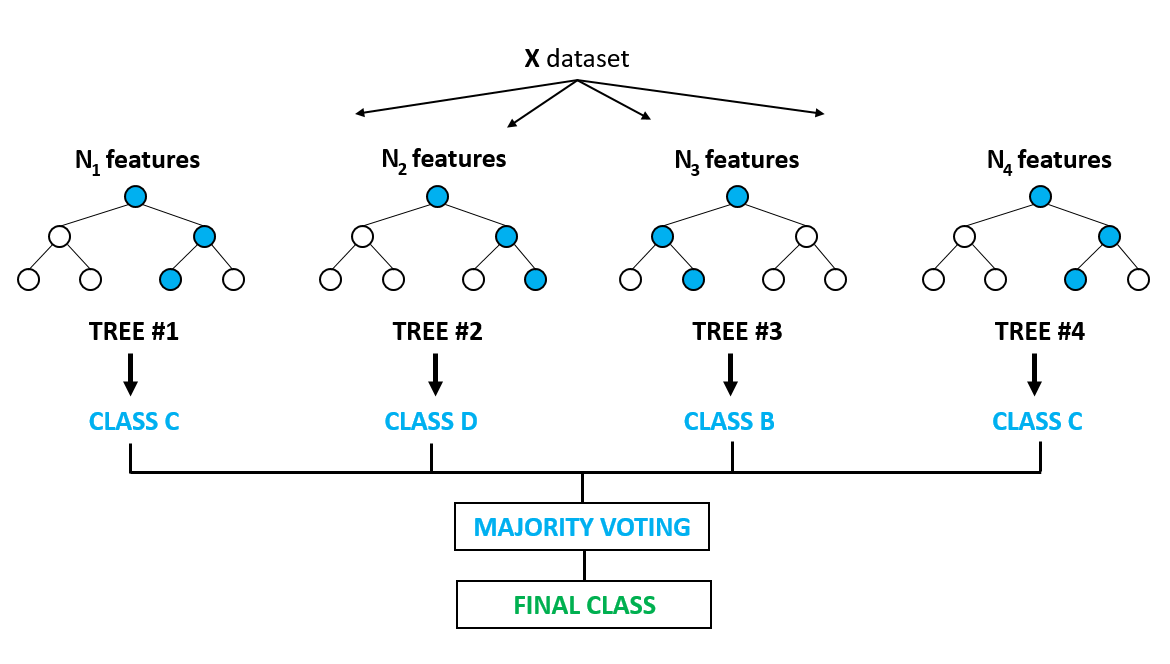

- Random forest is a supervised learning algorithm. It has two variations – one is used for classification problems and other is used for regression problems. It is one of the most flexible and easy to use algorithm. It creates decision trees on the given data samples, gets prediction from each tree and selects the best solution by means of voting. It is also a pretty good indicator of feature importance.
- Random forest algorithm combines multiple decision-trees, resulting in a forest of trees, hence the name Random Forest. In the random forest classifier, the higher the number of trees in the forest results in higher accuracy.

#### How does the algorithm work?
It works in four steps:
1. Select random samples from a given dataset.
2. Construct a decision tree for each sample and get a prediction result from each decision tree.
3. Perform a vote for each predicted result.
4. Select the prediction result with the most votes as the final prediction.

#### Difference between Decision Tree and Random Forest
I will compare random forests with decision-trees. Some salient features of comparison are as follows:-
1. Random forests is a set of multiple decision-trees.
2. Decision-trees are computationally faster as compared to random forests.
3. Deep decision-trees may suffer from overfitting. Random forest prevents overfitting by creating trees on random forests.
4. Random forest is difficult to interpret. But, a decision-tree is easily interpretable and can be converted to rules.

#### Relationship to nearest neighbour
A relationship between random forests and the k-nearest neighbours algorithm was pointed out by Lin and Jeon in 2002. It turns out that both can be viewed as so-called weighted neighbourhoods schemes. These are models built from a training set that make predictions for new points by looking at the neighbourhood of the point, formalized by a weight function.<br>
**Further Reading:**  https://www.datacamp.com/community/tutorials/random-forests-classifier-python

## <font color='orange'>Step II: Model Building

#### Building the model with `first type` of dataframe(df_type1)

In [ ]:
train_rf1_x = df1_trainX.copy()
train_rf1_x.head()

In [ ]:
train_rf1_y = df1_trainY.copy()
train_rf1_y.head()

In [ ]:
# Importing the library
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier with 20 decision tree
rfc1 = RandomForestClassifier(random_state=0,n_estimators=20)

# Train model
model_rfc1 = rfc1.fit(train_rf1_x, train_rf1_y)

# Predicting the classes
yhat3 = rfc1.predict(train_rf1_x)

# view the feature scores
feature_scores = pd.Series(rfc1.feature_importances_, index=train_rf1_x.columns).sort_values(ascending=False)
print('The importance of features ranked from high to low:\n',feature_scores)

from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(train_rf1_y.values, yhat3, labels=["A","B","C","D"])
print('\n\n-------The confusion matrix for this model is-------')
print(cm3)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_rf1_y.values, yhat3))

In [ ]:
# Creating bar plot of scores of variables importance
plt.figure(figsize=(10,8))
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

#### Predicting on test set

In [ ]:
test_rf1_x = df1_testX.copy()
test_rf1_x.head()

In [ ]:
test_rf1_y = df1_testY.copy()
test_rf1_y.head()

In [ ]:
y_rf1 = rfc1.predict(test_rf1_x)
y_rf1

In [ ]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_rf1_y.values, y_rf1, labels=["A","B","C","D"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_rf1_y.values, y_rf1))

In [ ]:
pd.Series(y_rf1).value_counts()

#### Building the model with `second type` of dataframe(df_type2)

In [ ]:
train_rf2_x = df2_trainX.copy()
train_rf2_x.head()

In [ ]:
train_rf2_y = df2_trainY.copy()
train_rf2_y.head()

In [ ]:
# Importing the library
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier with 20 decision tree
rfc2 = RandomForestClassifier(random_state=0,n_estimators=20)

# Train model
model_rfc2 = rfc2.fit(train_rf2_x, train_rf2_y)

# Predicting the classes
yhat4 = rfc2.predict(train_rf2_x)

# view the feature scores
feature_scores = pd.Series(rfc2.feature_importances_, index=train_rf2_x.columns).sort_values(ascending=False)
print('The importance of features ranked from high to low:\n',feature_scores)

from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(train_rf2_y.values, yhat4, labels=["A","B","C","D"])
print('\n\n-------The confusion matrix for this model is-------')
print(cm4)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_rf2_y.values, yhat4))

In [ ]:
# Creating bar plot of scores of variables importance
plt.figure(figsize=(10,8))
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

#### Predicting on test set

In [ ]:
test_rf2_x = df2_testX.copy()
test_rf2_x.head()

In [ ]:
test_rf2_y = df2_testY.copy()
test_rf2_y.head()

In [ ]:
y_rf2 = rfc2.predict(test_rf2_x)
y_rf2

In [ ]:
from sklearn.metrics import confusion_matrix
print('-------The confusion matrix for test data is-------\n')
print(confusion_matrix(test_rf2_y.values, y_rf2, labels=["A","B","C","D"]))

from sklearn.metrics import classification_report
print('\n\n-------Printing the report of test data-------\n')
print(classification_report(test_rf2_y.values, y_rf2))

In [ ]:
pd.Series(y_rf2).value_counts()

---
## <font color='orange'>Step III: Model Evaluation

In [ ]:
print('************************  MODEL-1 REPORT  *********************************\n')
print('Train data')
print(classification_report(train_rf1_y.values, yhat3))
print('\nTest data')
print(classification_report(test_rf1_y.values, y_rf1))

In [ ]:
print('************************  MODEL-2 REPORT  *********************************\n')
print('Train data')
print(classification_report(train_rf2_y.values, yhat4))
print('\nTest data')
print(classification_report(test_rf2_y.values, y_rf2))

<font color='blue'>1. It is clearly seen that model-1 is far better than model-2.<br>
<font color='blue'>2. But the point here to note that there are 2327 entries which are common in train-test data i.e. 2327 test entries(out of total 2627) are already in train data and when we see the result on test set model-1 gave 69% accuracy while model-2 gave 64%.<br>
<font color='blue'>3. A drop from 95% train accuracy to 69% test accuracy in model-1 shows that it overfit the train data while in model-2 69% of train accuracy and 64% of test accuracy gives a balaced trade-off.<br>
<font color='blue'>4. So we can conclude that `df_type2 is a better data` for model building in Random Forest technique.